In [1]:
import numpy as np
import pandas as pd
import copy
from keras import models, layers, callbacks

Using TensorFlow backend.


In [2]:
train_data = pd.read_csv("Dataset/adult.data", header=None)
test_data = pd.read_csv("Dataset/adult.test", header=None)
data_columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]
train_data.columns = data_columns
test_data.columns = data_columns
train_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
test_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [4]:
data = pd.concat([train_data, test_data], ignore_index=True)
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [5]:
print(data.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [6]:
data.income.unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

將收入>50專換為1，<=50轉換為-1

In [7]:
tmp = copy.deepcopy(data.income)
for (index, each) in enumerate(tmp):
    if each == " <=50K" or each == " <=50K.":
        data.income[index] = 0
    else:
        data.income[index] = 1
del tmp
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,0
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [8]:
data = pd.get_dummies(data, columns=[
    "workclass", "education","marital-status","occupation","relationship","race", "sex", "native-country"
])
data

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,215419,13,0,0,36,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,64,321403,9,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,38,374983,13,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,44,83891,13,5455,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
data.age = data.age.astype(float)
data.fnlwgt = data.fnlwgt.astype(float)
data["education-num"] = data["education-num"].astype(float)
data["hours-per-week"] = data["hours-per-week"].astype(float)
data["capital-gain"] = data["capital-gain"].astype(float)
data["capital-loss"] = data["capital-loss"].astype(float)

data

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39.0,77516.0,13.0,2174.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50.0,83311.0,13.0,0.0,0.0,13.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38.0,215646.0,9.0,0.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53.0,234721.0,7.0,0.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28.0,338409.0,13.0,0.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,215419.0,13.0,0.0,0.0,36.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,64.0,321403.0,9.0,0.0,0.0,40.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,38.0,374983.0,13.0,0.0,0.0,50.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,44.0,83891.0,13.0,5455.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
train = data[:32561]
test = data[32561:]

In [11]:
train.shape

(32561, 109)

In [12]:
y_train = np.asarray(train["income"]).astype('float32')
x_train = train.drop(["income"], axis=1).to_numpy()
y_test = np.asarray(test["income"]).astype('float32')
x_test = test.drop(["income"], axis=1).to_numpy()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(32561, 108) (32561,) (16281, 108) (16281,)


In [13]:
import tensorflow as tf
from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allocator_type = 'BFC' #A "Best-fit with coalescing" algorithm, simplified from a version of dlmalloc.
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth =True

set_session(tf.compat.v1.Session(config=config)) 

In [14]:
model = models.Sequential()

In [15]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [16]:
model.add(layers.Dense(200, input_shape=(108,), activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [17]:
model.compile(optimizer='adam',  loss='binary_crossentropy',  metrics=['accuracy'])

In [18]:
history = model.fit(x_train, y_train, epochs=500, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

Train on 26048 samples, validate on 6513 samples
Epoch 1/500
26048/26048 [==============================] - 6s 249us/step - loss: 543.6915 - accuracy: 0.6708 - val_loss: 233.5547 - val_accuracy: 0.7940
Epoch 2/500
26048/26048 [==============================] - 4s 163us/step - loss: 294.8103 - accuracy: 0.6817 - val_loss: 206.3773 - val_accuracy: 0.2457
Epoch 3/500
26048/26048 [==============================] - 4s 160us/step - loss: 259.7195 - accuracy: 0.6812 - val_loss: 66.5155 - val_accuracy: 0.7873
Epoch 4/500
26048/26048 [==============================] - 4s 158us/step - loss: 180.7029 - accuracy: 0.6815 - val_loss: 235.5838 - val_accuracy: 0.7812
Epoch 5/500
26048/26048 [==============================] - 4s 156us/step - loss: 136.9893 - accuracy: 0.6858 - val_loss: 34.1473 - val_accuracy: 0.7811
Epoch 6/500
26048/26048 [==============================] - 5s 177us/step - loss: 99.7396 - accuracy: 0.6850 - val_loss: 33.5984 - val_accuracy: 0.2457
Epoch 7/500
26048/26048 [============

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


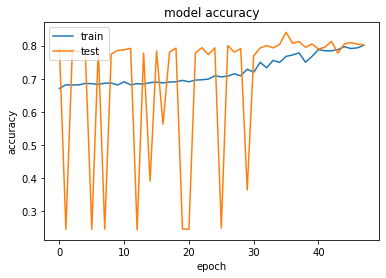

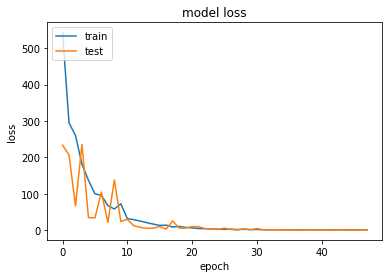

In [19]:

import matplotlib.pyplot as plt
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
model.save('model/income_perdict')

In [21]:
new_model = models.load_model('model/income_perdict')

In [22]:
pre = new_model.predict(x_test)

In [23]:
result = [(1.0 if each[0] > 0.5 else 0.0) for each in pre]
truetrue = 0
falsetrue = 0
truefalse = 0
falsefalse = 0
count = 0
for (idx, val) in enumerate(result):
    if y_test[idx] and val:
        truetrue+=1
    elif y_test[idx] and not val:
        truefalse+=1
    elif not y_test[idx] and val:
        falsetrue+=1
    elif not y_test[idx] and not val:
        falsefalse += 1
    count+=1
print("     ","true", "false")
print("true ", truetrue, falsetrue)
print("false", truefalse, falsefalse)
print((truetrue+falsefalse)/count)

true false
true  950 219
false 2896 12216
0.8086726859529513
